Import libraries needed

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load data

In [2]:
ds = pd.read_csv("data for sentiment.csv")

Check data

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
Created At         70000 non-null object
Language           70000 non-null object
Text               70000 non-null object
Extended Tweets    70000 non-null object
Retweets           70000 non-null object
dtypes: object(5)
memory usage: 2.7+ MB


In [4]:
ds.head()
ds.tail()

,Created At,Language,Text,Extended Tweets,Retweets
0,Fri Apr 27 17:15:16 +0000 2018,en,Paypal’s Former CEO Says #Bitcoin Investors Ar...,0,0
1,Fri Apr 27 17:15:17 +0000 2018,en,RT @escobar_inc: 【Dietbitcoin】Fork of Bitcoin ...,0,【Dietbitcoin】Fork of Bitcoin by Pablo Escobar'...
2,Fri Apr 27 17:15:17 +0000 2018,en,RT @ECAstronaut: I have decided to do 25 winne...,0,I have decided to do 25 winners.... 1000 each ...
3,Fri Apr 27 17:15:17 +0000 2018,en,RT @Aruwba: Join me this weekend for some HOT ...,0,Join me this weekend for some HOT fun in the g...
4,Fri Apr 27 17:15:17 +0000 2018,en,Do we have the Right to financial Rebellion? #...,Do we have the Right to financial Rebellion? #...,0


,Created At,Language,Text,Extended Tweets,Retweets
69995,Thu May 03 13:17:48 +0000 2018,en,"#Bitcoin ($BTC) Payments To Return On Reddit, ...","#Bitcoin ($BTC) Payments To Return On Reddit, ...",0
69996,Thu May 03 13:17:50 +0000 2018,en,RT @EOTCOIN: AIRDROP ALERT - GET FREE CRYPTO -...,0,AIRDROP ALERT - GET FREE CRYPTO - One Million ...
69997,Thu May 03 13:17:50 +0000 2018,und,RT @Bitcoin: https://t.co/NCWMaiW1Vn,0,0
69998,Thu May 03 13:17:51 +0000 2018,en,RT @romad_antivirus: 💥ATTENTION!💥 WORLD SAFETY...,0,💥ATTENTION!💥 WORLD SAFETY IS FINALLY IN A GOOD...
69999,Thu May 03 13:17:51 +0000 2018,en,RT @Peurtoken: https://t.co/oXIXJbYU9R always ...,0,https://t.co/oXIXJbYU9R always supports labour...


Drop duplicates (if any)

In [5]:
ds.drop_duplicates(inplace=True)

In [6]:
len(ds)

69414

Cek num values (if any)

In [7]:
ds.replace("0", np.NaN, inplace=True)

In [8]:
ds.isnull().sum()

Created At             1
Language               1
Text                   1
Extended Tweets    56718
Retweets           39007
dtype: int64

Drop null values from table

In [9]:
ds.dropna(axis=0, how="any", subset=["Language"], inplace=True)
ds.isnull().sum()

Created At             0
Language               0
Text                   0
Extended Tweets    56717
Retweets           39006
dtype: int64

Check how many data is left

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69413 entries, 0 to 69999
Data columns (total 5 columns):
Created At         69413 non-null object
Language           69413 non-null object
Text               69413 non-null object
Extended Tweets    12696 non-null object
Retweets           30407 non-null object
dtypes: object(5)
memory usage: 3.2+ MB


Convert date and time format

In [ ]:
#ds["created_at"] = pd.to_datetime(ds["created_at"], errors = 'ignore')

In [11]:
ds.head()
ds.tail()

,Created At,Language,Text,Extended Tweets,Retweets
0,Fri Apr 27 17:15:16 +0000 2018,en,Paypal’s Former CEO Says #Bitcoin Investors Ar...,NaN,NaN
1,Fri Apr 27 17:15:17 +0000 2018,en,RT @escobar_inc: 【Dietbitcoin】Fork of Bitcoin ...,NaN,【Dietbitcoin】Fork of Bitcoin by Pablo Escobar'...
2,Fri Apr 27 17:15:17 +0000 2018,en,RT @ECAstronaut: I have decided to do 25 winne...,NaN,I have decided to do 25 winners.... 1000 each ...
3,Fri Apr 27 17:15:17 +0000 2018,en,RT @Aruwba: Join me this weekend for some HOT ...,NaN,Join me this weekend for some HOT fun in the g...
4,Fri Apr 27 17:15:17 +0000 2018,en,Do we have the Right to financial Rebellion? #...,Do we have the Right to financial Rebellion? #...,NaN


,Created At,Language,Text,Extended Tweets,Retweets
69995,Thu May 03 13:17:48 +0000 2018,en,"#Bitcoin ($BTC) Payments To Return On Reddit, ...","#Bitcoin ($BTC) Payments To Return On Reddit, ...",NaN
69996,Thu May 03 13:17:50 +0000 2018,en,RT @EOTCOIN: AIRDROP ALERT - GET FREE CRYPTO -...,NaN,AIRDROP ALERT - GET FREE CRYPTO - One Million ...
69997,Thu May 03 13:17:50 +0000 2018,und,RT @Bitcoin: https://t.co/NCWMaiW1Vn,NaN,NaN
69998,Thu May 03 13:17:51 +0000 2018,en,RT @romad_antivirus: 💥ATTENTION!💥 WORLD SAFETY...,NaN,💥ATTENTION!💥 WORLD SAFETY IS FINALLY IN A GOOD...
69999,Thu May 03 13:17:51 +0000 2018,en,RT @Peurtoken: https://t.co/oXIXJbYU9R always ...,NaN,https://t.co/oXIXJbYU9R always supports labour...


Check language if not english, return false

In [12]:
#yseries[myseries  == 'VALUE'].index.tolist() 

count_en = ds["Language"] == "en"
count_en[0:20]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16    False
17     True
18     True
19     True
Name: Language, dtype: bool

Test random data pick, just check if there's any language that's not english

In [13]:
ds["Text"][11]
ds["Text"][16]

'RT @Bitso: 🚀 🎉 Bitcoin es el primer bien digital finito del cuál existirán solo 21 millones de unidades. El día de hoy fue minado el Bitcoi…'

'Explosión de Bitcoin, Dukascopy Swiss Forex Bank &amp; Marketplace Demo Account / Binary options #LI ➡️ 4T4 https://t.co/oI9gnCxjoU'

View how many language are there on the data

And plot the data values

en     57172
und     4753
ja      2049
es      1301
tr       736
de       586
fr       564
pt       428
ru       389
in       219
it       163
nl       145
et       121
vi        83
pl        79
Name: Language, dtype: int64

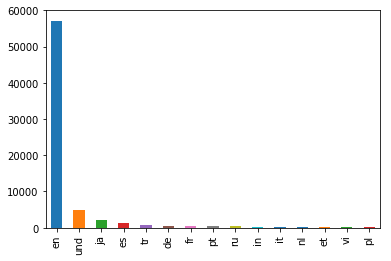

In [14]:
ds_lang = ds["Language"].value_counts()
ds_lang.head(15).plot(kind="bar")
ds_lang.head(15)

Values of english language data

In [15]:
ds_lang_en = ds[ds.Language == 'en']
ds_lang_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57172 entries, 0 to 69999
Data columns (total 5 columns):
Created At         57172 non-null object
Language           57172 non-null object
Text               57172 non-null object
Extended Tweets    9930 non-null object
Retweets           28484 non-null object
dtypes: object(5)
memory usage: 2.6+ MB


In [16]:
ds_lang_en.head()
ds_lang_en.tail()

,Created At,Language,Text,Extended Tweets,Retweets
0,Fri Apr 27 17:15:16 +0000 2018,en,Paypal’s Former CEO Says #Bitcoin Investors Ar...,NaN,NaN
1,Fri Apr 27 17:15:17 +0000 2018,en,RT @escobar_inc: 【Dietbitcoin】Fork of Bitcoin ...,NaN,【Dietbitcoin】Fork of Bitcoin by Pablo Escobar'...
2,Fri Apr 27 17:15:17 +0000 2018,en,RT @ECAstronaut: I have decided to do 25 winne...,NaN,I have decided to do 25 winners.... 1000 each ...
3,Fri Apr 27 17:15:17 +0000 2018,en,RT @Aruwba: Join me this weekend for some HOT ...,NaN,Join me this weekend for some HOT fun in the g...
4,Fri Apr 27 17:15:17 +0000 2018,en,Do we have the Right to financial Rebellion? #...,Do we have the Right to financial Rebellion? #...,NaN


,Created At,Language,Text,Extended Tweets,Retweets
69994,Thu May 03 13:17:49 +0000 2018,en,RT @cryptomanran: 3 weeks ago media was talkin...,NaN,NaN
69995,Thu May 03 13:17:48 +0000 2018,en,"#Bitcoin ($BTC) Payments To Return On Reddit, ...","#Bitcoin ($BTC) Payments To Return On Reddit, ...",NaN
69996,Thu May 03 13:17:50 +0000 2018,en,RT @EOTCOIN: AIRDROP ALERT - GET FREE CRYPTO -...,NaN,AIRDROP ALERT - GET FREE CRYPTO - One Million ...
69998,Thu May 03 13:17:51 +0000 2018,en,RT @romad_antivirus: 💥ATTENTION!💥 WORLD SAFETY...,NaN,💥ATTENTION!💥 WORLD SAFETY IS FINALLY IN A GOOD...
69999,Thu May 03 13:17:51 +0000 2018,en,RT @Peurtoken: https://t.co/oXIXJbYU9R always ...,NaN,https://t.co/oXIXJbYU9R always supports labour...


# Getting our Texts

In [17]:
ds_lang_en.reset_index(inplace=True)

In [18]:
ds_lang_en.drop(columns=["index"], inplace=True)

C:\Anaconda3\envs\dm_crawling\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
ds_lang_en.tail()

,Created At,Language,Text,Extended Tweets,Retweets
57167,Thu May 03 13:17:49 +0000 2018,en,RT @cryptomanran: 3 weeks ago media was talkin...,NaN,NaN
57168,Thu May 03 13:17:48 +0000 2018,en,"#Bitcoin ($BTC) Payments To Return On Reddit, ...","#Bitcoin ($BTC) Payments To Return On Reddit, ...",NaN
57169,Thu May 03 13:17:50 +0000 2018,en,RT @EOTCOIN: AIRDROP ALERT - GET FREE CRYPTO -...,NaN,AIRDROP ALERT - GET FREE CRYPTO - One Million ...
57170,Thu May 03 13:17:51 +0000 2018,en,RT @romad_antivirus: 💥ATTENTION!💥 WORLD SAFETY...,NaN,💥ATTENTION!💥 WORLD SAFETY IS FINALLY IN A GOOD...
57171,Thu May 03 13:17:51 +0000 2018,en,RT @Peurtoken: https://t.co/oXIXJbYU9R always ...,NaN,https://t.co/oXIXJbYU9R always supports labour...


In [21]:
np.isnan(ds.loc[0, "Retweets"])
ds.loc[1, "Retweets"] is np.NaN

True

False

In [22]:
def get_full_text(i):
    """
    i is index of dataframe (row) 
    """
    assert (type(i) is int), "Parameter is not Integer"
    
    if ds_lang_en.loc[i, "Extended Tweets"] is not np.NaN:
        return ds_lang_en.loc[i, "Extended Tweets"]
    elif ds_lang_en.loc[i, "Retweets"] is not np.NaN:
        return ds_lang_en.loc[i, "Retweets"]
    else:
        return ds_lang_en.loc[i, "Text"]

In [23]:
ds_lang_en = ds_lang_en.assign(fulltext = [ get_full_text(i) for i in range(len(ds_lang_en)) ])

A bit of comparison

In [24]:
ds_lang_en.head()

,Created At,Language,Text,Extended Tweets,Retweets,fulltext
0,Fri Apr 27 17:15:16 +0000 2018,en,Paypal’s Former CEO Says #Bitcoin Investors Ar...,NaN,NaN,Paypal’s Former CEO Says #Bitcoin Investors Ar...
1,Fri Apr 27 17:15:17 +0000 2018,en,RT @escobar_inc: 【Dietbitcoin】Fork of Bitcoin ...,NaN,【Dietbitcoin】Fork of Bitcoin by Pablo Escobar'...,【Dietbitcoin】Fork of Bitcoin by Pablo Escobar'...
2,Fri Apr 27 17:15:17 +0000 2018,en,RT @ECAstronaut: I have decided to do 25 winne...,NaN,I have decided to do 25 winners.... 1000 each ...,I have decided to do 25 winners.... 1000 each ...
3,Fri Apr 27 17:15:17 +0000 2018,en,RT @Aruwba: Join me this weekend for some HOT ...,NaN,Join me this weekend for some HOT fun in the g...,Join me this weekend for some HOT fun in the g...
4,Fri Apr 27 17:15:17 +0000 2018,en,Do we have the Right to financial Rebellion? #...,Do we have the Right to financial Rebellion? #...,NaN,Do we have the Right to financial Rebellion? #...


In [25]:
ds_lang_en.loc[2, "Text"]
ds_lang_en.loc[2, "fulltext"]

'RT @ECAstronaut: I have decided to do 25 winners.... 1000 each for the last 25000 #ECA from the 125000 #Electra follow giveaway....💜 20 mor…'

'I have decided to do 25 winners.... 1000 each for the last 25000 #ECA from the 125000 #Electra follow giveaway....💜 20 more follows and 25 followers will get 1000 ECA each!!!👌💜 Spread love.... #Community #Crypto #cryptonews #Bitcoin #BTC $BTC #Verge #XVG $XVG #XRP #LOVE #HODL https://t.co/UhHTja9Db6'

In [26]:
ds_lang_en.drop(columns=["Text", "Extended Tweets", "Retweets"], inplace=True)

In [27]:
ds_lang_en.head()

,Created At,Language,fulltext
0,Fri Apr 27 17:15:16 +0000 2018,en,Paypal’s Former CEO Says #Bitcoin Investors Ar...
1,Fri Apr 27 17:15:17 +0000 2018,en,【Dietbitcoin】Fork of Bitcoin by Pablo Escobar'...
2,Fri Apr 27 17:15:17 +0000 2018,en,I have decided to do 25 winners.... 1000 each ...
3,Fri Apr 27 17:15:17 +0000 2018,en,Join me this weekend for some HOT fun in the g...
4,Fri Apr 27 17:15:17 +0000 2018,en,Do we have the Right to financial Rebellion? #...


# Hashtag String

Import regular expression libraries that is used for text cleaning

In [28]:
import re
import nltk

Test check text from data

In [29]:
text_string = ds_lang_en["fulltext"][0]
text_string
type(text_string)

'Paypal’s Former CEO Says #Bitcoin Investors Are ‘Drinking the Kool-Aid’ https://t.co/asb9U80viT #crypto #blockchain https://t.co/crYs3ifhFC'

str

Make function that gets hashtag from text

In [30]:
hashtag = []

def hashtag_getter(x):
    """
    Accepts text_string as an input, return hashtag list
    """
    ts = x.split()
    for item in ts:
        for letters in item:
            if '#' in letters:
                hashtag.append(item[1:])

hashtag

[]

In [31]:
trash = [hashtag_getter(item) for item in ds_lang_en["fulltext"]]

View what hashtag is there

In [32]:
hashtag

['Bitcoin',
 'crypto',
 'blockchain',
 'dietbitcoin',
 'ddx',
 'ECA',
 'Electra',
 'Community',
 'Crypto',
 'cryptonews',
 'Bitcoin',
 'BTC',
 'Verge',
 'XVG',
 'XRP',
 'LOVE',
 'HODL',
 'BTC',
 'Bitcoin',
 'cryptocurrency',
 'Litecoin',
 'Occupy',
 'Inequality',
 'Bitcoin',
 'State',
 'Neoliberalism',
 'ICOs!',
 'Crypto',
 'Blockchain',
 'ERC20',
 'Blockchain',
 'Bitcoin',
 'Ethereum',
 'Coinbase',
 'Litecoin',
 'ICO',
 'preICO',
 'presale',
 'SmartContract',
 'Coinmarketcap',
 'ETH',
 'BTC',
 'bitcoins',
 'bitcoin',
 'MtGox',
 'AIREXE',
 'ICO',
 'bitcoin',
 'hodl',
 'ICO',
 'CRYPTOCURRENCY',
 'BITCOIN',
 'ETH',
 'ETHEREUM',
 'BTC',
 'INVESTMENT',
 'cardium',
 'sport',
 'fitness',
 'health',
 'cryptocurrencies',
 'cryptocurrency',
 'cryptotrading',
 'mining',
 'cryptonews',
 'Memes',
 'joke',
 'jokes',
 'bitcoin',
 'ethereum',
 'blockchain',
 'girl',
 'likeaboss',
 'fun',
 'weightloss',
 'overweight',
 'ico',
 'preico',
 '#comingsoon)',
 'bitcoin',
 'litecoin',
 'ethereum',
 'ico',
 '

In [33]:
type(hashtag)

list

How many hashtag is there?

In [34]:
len(hashtag)

331243

Get hashtag frequency terms 

In [35]:
help(str.lower)

Help on method_descriptor:

lower(...)
    S.lower() -> str
    
    Return a copy of the string S converted to lowercase.



In [36]:
hashtag = [ item.lower() for item in hashtag ]

In [37]:
freq_dist_nltk = nltk.FreqDist(hashtag)
print(freq_dist_nltk)

for k, v in freq_dist_nltk.items():
    print(str(k) + ':' + str(v))

<FreqDist with 9628 samples and 331243 outcomes>
bitcoin:33389
crypto:16417
blockchain:18178
dietbitcoin:1628
ddx:1627
eca:49
electra:11
community:53
cryptonews:1704
btc:11025
verge:249
xvg:792
xrp:1069
love:78
hodl:532
cryptocurrency:17559
litecoin:2927
occupy:1
inequality:1
state:1
neoliberalism:1
icos!:6
erc20:1255
ethereum:14493
coinbase:508
ico:14058
preico:1260
presale:702
smartcontract:512
coinmarketcap:96
eth:8711
bitcoins:370
mtgox:15
airexe:32
investment:738
cardium:193
sport:201
fitness:110
health:239
cryptocurrencies:1620
cryptotrading:251
mining:558
memes:36
joke:28
jokes:42
girl:29
likeaboss:28
fun:67
weightloss:45
overweight:34
#comingsoon):1
blockchaintech:20
bethereum:458
bthr:178
wealthmigrate:342
wealthe:342
pantera:4
money:474
altcoins:1835
altcoin:4481
cryptocoins:44
cryptocoin:44
miningpool:356
multipool:312
yaamp:312
poolyapool:311
ltc:1823
gulp:57
tron:671
business:478
finances:19
data:87
technology:797
fundraising:4
tokensale:2413
fintech:5059
cry…:24
pr:6
reme

ironblock:28
managementcontrolsystem:1
terrorismfinancing:2
bitsmart:24
pki:21
xpander:8
jollycoin:8
x1:8
x2:8
bethereum!:45
votebthr:36
reviewbthr:62
usd.:76
sub:16
skyllz:75
sdp:67
futureofeducation:39
skills-validation:21
theskyllzisthelimit:29
3:12
sks8:4
markets:70
bullrun:14
tron!:1
greenbit::1
onsumers,#preico:1
marketalert:10
europeancryptob:16
merrilllynch:8
bitcoin?:49
priorities:1
guariumcontact:1
guarium:43
ecommerce,:1
contestalert:2
skyfchain:47
kkrdirt:1
offroadheat:1
staycoollikejax:2
followjax:2
metamorphpro:4
volume:2
newsteaser:12
bitcoininvestment:8
bitcoinz:22
domainforsale:2
domain:4
crypotcurrencies:2
bitcoinwiki,:4
bitcoinprofitcalculator:2
#otg):5
thecoinagetimes:8
umd:3
litecoinfam...:1
baldwin:3
worldcryptocon?:5
etherisc,:2
worldopoly:5
bash:2
blockchainnews:21
cryptocoinnews:2
decentralizedinsurance:2
decoinicoreview:2
delayedflights:2
ecb:4
privatebank:2
archos:1
tax:35
virtualcurrency:55
buildingmountains:2
hnw:1
traxion:14
wikipedia:4
steemit:28
geolocat

crypto…:3
cryptolamp:1
dimecoin:13
kripto:32
ovis:28
oviscomtr:28
paribu:28
btcturk:31
koineks:28
binans:28
koin:28
dijitalpara:28
box:33
beonbox:4
cheap:5
xrpbtc:3
charlielee:8
earncrypto:3
coursbitcoin,:3
bitcointousd:2
crypto-#cryptocurrency-#blockchain-#bitcoin-#ico-#:24
crypto---cryptocurrency---blockchain--:4
bitcoin).:2
itcoin#:6
#friday:1
highstandards:2
learnenglish:11
mlp:1
discordapp:1
discordserver:2
1,:9
priceupdate:2
ripple::2
tr...:1
dai:1
1):1
lux:1
smart:8
pepehammer:1
rarepepe:4
pepewisdom:3
pepecash:4
#markets:2
#predictions:2
price::6
rotator:1
eur:12
cny:4
gbp:11
rub:4
27apr:1
dolartoday:2
criptomonedas:3
bcgsocialmedia,:4
orderbook:10
tokentalk:3
ethereumclassic,:3
ipl2018:32
ipl:31
we:1
wealthgeneration:7
texdercourse:7
#bitcoin):8
these:1
antminer:1
coinsquare:1
riotblockchain:2
apple:7
elfminer:2
element:1
poker:17
forum:2
rewards:7
6zs:2
monexgroup:1
operatingmargin:1
over:1
airdr…:1
bitcoinmachine:3
a:2
macd:2
the:6
asic:11
icocoin:71
earn_money:662
algorbloc

bancor:7
indiegogo:2
paris:32
moneda:10
mnd:20
greenday:2
buynow:10
casadecrypto:2
teamin:2
on:2
climateaction:1
cobenefits:2
airquality:1
bitcoinchart:3
planet:1
sustainable:2
capitalism:1
globalwarming:1
climatechangeisreal:1
pollution:1
numismatics:1
coincollecting:1
asia:10
share...:2
iqb:60
dan:1
sphtx:1
bto:7
auc:2
australiansecuritiesandinvestmentscommission:1
applicationspecificintegratedcircuit:1
shenzhenstockexchange:1
investing':1
fintechfinance:2
cryptoworld:9
ripplenews:1
lithuania:2
unikoingold:7
hash:5
localcoinswap:5
globatalent:12
gbt:36
infinitywar:15
blockchainleadershipsummit:1
blockchainmining:1
binary:6
dividends:1
run:2
runner:2
paydiamond:1
cardiumworld:4
neochain:24
jogging:3
workout:3
gym:3
freepicks:3
sportsbet:4
mlbpicks:3
mlb:8
baseball:3
parlay:3
cdtv:3
ggo_anime:3
俺達の少女a:3
appcoin:3
supplychain:6
groestlcoin:15
ontology:6
elastos:1
eosdac:1
dentcoin:5
brazil:7
topup:7
etheruem:2
rekt:8
scalping:3
crack:3
easywork:1
easymoney:76
eslots:8
ethereumslotmachin

liquidbyquoine:4
coins...:1
altcoingazette:6
southwestlondon:1
bcash,:1
kualalumpur!:1
supercars:1
iqoption:1
cryptogaming:1
pokerlife:2
altcoins?:3
folowme:3
bitcoinfree:2
freesatochi:1
cftc:23
regulatingthecftc:2
luckchemy:2
luk:1
parrotcoin:5
odyssey:6
$btc:1
ds:1
xyoraclenetwork:1
1!:2
voxel:2
bitcoinfork:2
stevennerayoff:2
zclassicfork:2
nigerianlazyyouth:1
equi_capital:2
terravirtua:1
markmytweet:1
cryptothoughts:1
fees:2
blochchain:2
demeterlife:1
demeter:1
organicfood:1
eosio:2
eoskissm:1
eoextour:2
stenttoken:19
article:3
wordpressblogs:1
boxoffice:2
bollywood:2
shahrukhkhan:2
akshaykumar:2
salmankhan:2
deepikapadukone:2
sunnyleone:2
dishapatani:2
ranveersingh:2
hollywood:29
eth.:4
hacker:22
xbl:1
gp:1
imx:1
exvo:1
baas:19
society:3
derivatives:1
btcfree:2
us:#sec:2
official:1
balanced,#congressman:2
suggests:1
ban:1
cryptoregulations:8
#giveaway:1
cryp:14
waveslab:10
bitup:1
scc:2
but:2
buzcoin,:1
crypton…:1
b2b:3
workhardplayhard:1
earth2moom:13
climate:34
carbon:35
ripplexr

drone:2
btcdrone:1
kcs:2
part:1
zrx:5
gxs:2
powr:5
soundcloud:2
beats:1
kanye:49
studio:2
sendmebeats:1
producers:1
niklasnikolajsen:1
bitcoinsuisseag:1
💪#btrash:1
forever:2
ausbiz:2
auspol:8
royalcommission:1
bankingrc:1
givetrack:1
ledgerwallet:5
dogecoin#cryptocurrencies:2
blockchaintechnology.:1
flipnpik.:1
virtual:2
vent:2
googletopcharts:2
controller::1
experience:2
history:26
1564965:1
coinmarketbot:3
roduct.#capitaltechnologiesresearch,:1
comingsoon:4
freestuff:1
ct_index:3
cloudmininglist,:1
whatiscryptomining:2
investments::1
cryptcurrecny:1
pplications.#capitaltechnologiesresearch,:3
dayssincelastfork:1
chain:2
satoshinakamoto:4
sweden:1
xriba:29
airdrop!!:2
block:2
psvita:3
rise:7
workathome:1
crypon:1
projecthai:1
myblockinfo:2
litec…:2
applereference:1
capp:1
xyonetwork::1
alfacoin:1
irony:1
wyoming:1
cryptocurrency::1
holdvest's:9
datascientist:6
bi:7
bitcoinfeecalculator:1
womenintech:6
grainio:2
#bch:1
nfc:1
mobilepayments:1
identityfunction:1
columbiauniversity:1
f…:1

tkeycoin:1
tcd:1
cryptocur…:3
req/btc:1
🚀🚀🚀#req/btc:1
eosprice:1
eospriceprediction:1
danlarimer:1
block.one:1
bitcoinworkshop:1
musiclife:2
studiogrind:2
poweredbytao:2
futureisnow:2
altmarket:2
bsmg:2
theboogieshack:2
linkmediapartners:2
fasterpayments:20
bodava:4
moneyflower:1
western:5
bitcointodollar,:1
erc223:2
bgold:10
bitcoinwalletonline,:1
bitcoinatm:2
story:1
write:1
lesson:1
lifelessons:1
lifelesson:1
pet:1
pets:1
eyc:6
токены:26
ольгабузова:26
бузова:26
buzar:27
unocoin:2
gofintech:1
3::8
childrensbooks:1
investor's:1
smallbiz:3
urunit:1
avcjkorea:1
optionstrading:1
wealthmanagement:25
digifoundation:2
engineer:2
digiid:2
egamex:3
egamexcoin:3
swap:3
novaexchange:3
bleutrade:3
cryptohub:3
knowledgeprotocol:1
crytocurrencies:1
protocols:1
bitcoinstock,:3
research:5
realtime:3
trends:5
popcorntime:1
chrysalis:2
fundraising.:2
youth:2
l…:1
cryptosphere:1
latestbitcoinprice:4
hodlbtfd:2
rome:1
erc20tokenhttps:1
long:1
mambamentality:1
cryptomamba:3
stillworkingwhiletheysleep:1


swissrealсoinico:1
swissrealcoin:1
2k18:1
markspace:1
mrk:1
ptc:1
africunia:1
afcash.:1
bitcoin.the:1
never:3
usarmyeurope:1
ofxarkit:1
vergepartnership:4
bitcoinexchange,:3
1bitcointoinr:1
ethere:1
suncontract:1
energytransition:1
coinspy:4
altcoins,:52
multifunctional:4
used:4
shopping,:4
creditting,:4
neo6:6
hold:2
eht:1
coindesk.:1
udd",#mentalhealthawarenessmonth,#tonyawards2018:2
bitcoin-rich,:1
debt.:1
lon:5
barc:5
pennystock…:1
impressioltd:1
swapblocks:1
signalsnetwork:2
gainwithjnshine:2
freefollow:2
pending:1
japaneseyen:1
livetrading:1
trumptariff:1
brexitshambles:1
koreanpeace:1
#earnings::1
hmrc:1
noretrotax:1
#blockchain:6
leominster:1
mindfulsocial:1
bitcoincase::1
nikkithetrainer:1
dating:4
subsavestheinternet,:1
wishfulthinking!:1
neblioorion:3
powerledger:2
1bitcoiningbp,:1
securityn:1
13133::1
cryptoanalysis:1
crowdcube:1
vergefam!:4
bitcoin’:2
stealthaddress:1
focusdifferently:2
teamwithp:2
adifferentdrive:2
addbiz:2
thc:1
tnbbtc:1
raleigh:1
moneygrabbing:1
notjust

️💰#tripagotravel📢:3
index:2
cac:1
bist:1
stoxx:1
sinyal:1
analiz:1
limitforex:1
limitfx:1
nuggetsareforever:1
mcdocoin:1
hodor:1
byteball.:3
platincoin:1
inv…https://t.co/iayiwwuzxl:2
luxurytravel:1
luxurylifestyle:1
corporateevents:1
oilandgas:1
emergingmarkets:1
jerseyci:1
visitjersey:1
jsy2018:1
voteje:1
storagemining:1
wcx:1
espn:2
worlddomination:1
creditcards:1
bankaccounts.:1
#johnmcafee:1
honeybadger:1
trst:1
rocatilimitedico:1
sandilemantsoe's:1
mue/btc:1
🚀🚀🚀#mue/btc:1
yee:4
bitg:1
loom:2
au:1
coinmo:1
😢#btc:1
ethereumtogbp,:1
bitcoinfact:1
flippening:1
whaleseason:1
xvg-usd:1
xvg-euro:1
stanford,:1
wharton:1
georgetown:1
gain:1
dontmissit:1
myfreeticket:1
profitablesystem:1
catchpips:1
fxcapital:1
pmg:1
entreprenur:1
forexlifestyle:1
trueplay:1
gt;&gt;&gt;&gt;&gt;&gt;#airdrop:2
alternativefacts::1
learningtime:1
moneytransfer:1
elysian:2
kickico:4
hashgraph:2
hayek:8
ss:1
eve:1
ubt:1
dgb::7
virtualtokens:2
themisnetwork:1
rufollowme:1
terminology:2
knowledge:2
ikuyatakashima:

menubuzz:1
nazihonline:1
trumpeter:1
econ:2
thing:15
cryptandise:1
cheers:1
fridays:1
loveit:1
beers:1
plaak:1
howtomakemoneyonline:1
sprout,:1
japan,:1
$ltc:3
cryptonewswire:1
l4l:1
blockchainweek:1
sanjose:1
dallas:1
sqpay:1
sandeigo:1
supplychain?:2
ite.#flogmall:1
authentication:1
transactioncost:1
paddle8:1
kucoin::1
cryptocurrecny:1
stoptrumpcare:1
lock#0:1
lock#1:1
alphanode??:1
alphashare:1
crowdsale!:1
alphainvesting:1
alpha:1
exotic:1
boring:1
cryptohustler:1
blacksatoshi:1
startuplife:1
startupstory:1
#wax):6
listings;:1
zil:1
peculium:2
cryptosavings:2
livewebapps:1
thanks:1
altcoins.:2
icoclairety:1
flash:4
kidderminsterjobs:1
#moneytoken:3
technology.:1
promo:1
hexxcommunity:1
hexxbitcoinhardfork:1
gujaratgoverment:1
vtvlive:1
sellinmay:1
marketcapitalization:1
policebust:1
justice:1
fishingscam:1
wellnesscoin:1
crytoinvestment:1
mana):1
tcc:1
ermahgerd:1
bitcoinpriceprediction:1
blok:3
preventadfraud:3
blockclick:3
creativesunblocked:1
#bitcoininbrief:2
bitgrail:1
btcxch

In [38]:
type(freq_dist_nltk)
freq_dist_nltk.most_common(50)

nltk.probability.FreqDist

[('bitcoin', 33389),
 ('blockchain', 18178),
 ('cryptocurrency', 17559),
 ('crypto', 16417),
 ('ethereum', 14493),
 ('ico', 14058),
 ('btc', 11025),
 ('eth', 8711),
 ('fintech', 5059),
 ('altcoin', 4481),
 ('airdrop', 4165),
 ('rt', 3981),
 ('news', 3733),
 ('ripple', 3597),
 ('xmr', 3055),
 ('litecoin', 2927),
 ('investments', 2850),
 ('trapadrive', 2783),
 ('zec', 2753),
 ('reddit', 2705),
 ('f4f', 2658),
 ('bounty', 2430),
 ('tokensale', 2413),
 ('freebitcoin', 2091),
 ('robotcoingame', 2024),
 ('altcoins', 1835),
 ('ltc', 1823),
 ('token', 1791),
 ('cryptonews', 1704),
 ('dietbitcoin', 1628),
 ('ddx', 1627),
 ('cryptocurrencies', 1620),
 ('preico', 1260),
 ('erc20', 1255),
 ('crowdsale', 1255),
 ('bitcoinnews', 1230),
 ('wsj', 1226),
 ('bitnews', 1222),
 ('cryptocurrencynews', 1161),
 ('giveaway', 1071),
 ('xrp', 1069),
 ('trading', 1069),
 ('bitcointalk', 955),
 ('ether', 901),
 ('satoshi', 859),
 ('airdrops', 837),
 ('binance', 802),
 ('tokens', 800),
 ('technology', 797),
 ('xvg

Check figure from term frequencies

<Figure size 864x432 with 0 Axes>

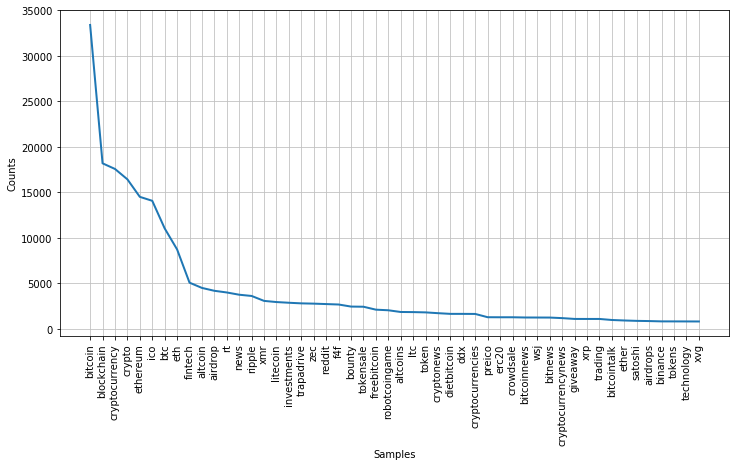

In [39]:
plt.figure(figsize=(12,6))
freq_dist_nltk.plot(50, cumulative=False)

# Text String

In [40]:
# import libraries needed for text cleaning

from nltk import word_tokenize
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

Check text - head

In [41]:
# check text head

ds_lang_en["fulltext"].head()

0    Paypal’s Former CEO Says #Bitcoin Investors Ar...
1    【Dietbitcoin】Fork of Bitcoin by Pablo Escobar'...
2    I have decided to do 25 winners.... 1000 each ...
3    Join me this weekend for some HOT fun in the g...
4    Do we have the Right to financial Rebellion? #...
Name: fulltext, dtype: object

Convert the data frame into list

In [42]:
# change pandas Series to list

text_list = ds_lang_en["fulltext"].tolist()
text_list[:5]

['Paypal’s Former CEO Says #Bitcoin Investors Are ‘Drinking the Kool-Aid’ https://t.co/asb9U80viT #crypto #blockchain https://t.co/crYs3ifhFC',
 "【Dietbitcoin】Fork of Bitcoin by Pablo Escobar's brother for only $3.50 per coin. https://t.co/zV9Z9lxKis deposit BTC now and purchase dietbitcoin DDX #dietbitcoin #ddx $ddx",
 'I have decided to do 25 winners.... 1000 each for the last 25000 #ECA from the 125000 #Electra follow giveaway....💜 20 more follows and 25 followers will get 1000 ECA each!!!👌💜 Spread love.... #Community #Crypto #cryptonews #Bitcoin #BTC $BTC #Verge #XVG $XVG #XRP #LOVE #HODL https://t.co/UhHTja9Db6',
 "Join me this weekend for some HOT fun in the garden 💦 Don't miss out add my premium now! 🔥ONLY $25 FOR LIFE🔥 The price goes back up on Monday🙀 Click Here ➡️ https://t.co/nlE16zz4hC #BTC #Bitcoin $crypto $cryp $btc #cryptocurrency #Litecoin Accepted😚 https://t.co/3IGxOoZQwj",
 'Do we have the Right to financial Rebellion? #Occupy #Inequality #Bitcoin #State #Neoliberalis

Make function to get clean string from text

Clean string is string without links, RT, @username, and hashtags. Also it should be more than 1 character length

In [43]:
# create a function to clean some nasty stuff

def get_text_string(x):
    """
    Input: String
    Output: String
    - Get rid of some unneeded http, #, RT and @
    """
    assert (type(x) == str), "inputted values is not string"
    alist = []
    
    for item in x.split():
        if item[:4] == "http" or item[:5] == "https" or item[0] == '#' or item[:2] == 'RT' or item[0] == '@' or item[0] == '$':
            pass
        elif len(item) > 1:
            alist.append(item)
        else:
            pass
        
    alist = ' '.join(alist) # create a str . return str
    return alist

In [44]:
# apply the function to the list

clean_text_list = [ get_text_string(item) for item in text_list ]
clean_text_list[:5]

['Paypal’s Former CEO Says Investors Are ‘Drinking the Kool-Aid’',
 "【Dietbitcoin】Fork of Bitcoin by Pablo Escobar's brother for only per coin. deposit BTC now and purchase dietbitcoin DDX",
 'have decided to do 25 winners.... 1000 each for the last 25000 from the 125000 follow giveaway....💜 20 more follows and 25 followers will get 1000 ECA each!!!👌💜 Spread love....',
 "Join me this weekend for some HOT fun in the garden Don't miss out add my premium now! 🔥ONLY FOR LIFE🔥 The price goes back up on Monday🙀 Click Here ➡️ Accepted😚",
 'Do we have the Right to financial Rebellion?']

In [45]:
# get rid of items except a-z and A-Z
# also make all letter lowercase

clean_text_list = [ re.sub(r'[^a-zA-Z\']', ' ', item) for item in clean_text_list ]
clean_text_list = [ sentence.lower() for sentence in clean_text_list ]
clean_text_list[:5]

['paypal s former ceo says investors are  drinking the kool aid ',
 " dietbitcoin fork of bitcoin by pablo escobar's brother for only per coin  deposit btc now and purchase dietbitcoin ddx",
 'have decided to do    winners          each for the last       from the        follow giveaway         more follows and    followers will get      eca each      spread love    ',
 "join me this weekend for some hot fun in the garden don't miss out add my premium now   only for life  the price goes back up on monday  click here    accepted ",
 'do we have the right to financial rebellion ']

In [46]:
# get rid of letters that is < 1 (or pretty much a letter)

final_clean_text_list = []

for item in clean_text_list:
    temp = []
    
    for word in item.split():
        if len(word) > 1:
            temp.append(word)
        else:
            pass
        c = " ".join(temp)
    
    final_clean_text_list.append(c)
    
            
final_clean_text_list[:10]

['paypal former ceo says investors are drinking the kool aid',
 "dietbitcoin fork of bitcoin by pablo escobar's brother for only per coin deposit btc now and purchase dietbitcoin ddx",
 'have decided to do winners each for the last from the follow giveaway more follows and followers will get eca each spread love',
 "join me this weekend for some hot fun in the garden don't miss out add my premium now only for life the price goes back up on monday click here accepted",
 'do we have the right to financial rebellion',
 "we're in the top of rated read more",
 'markets update cryptocurrencies erase two day losses https co hrxjtkegit',
 'an amount worth about million tied to the now defunct exchange were moved on thursday exchange is open registration and verification is started',
 "don't know how many of you in the room have actually got bitcoin but any of you who have got bitcoin will know it's pretty lousy medium of exchange right now",
 'bitcoin daily nasdaq might trade crypto']

In [47]:
len(final_clean_text_list)

57172

Number of words (tokenized text) in all of text

In [48]:
# stopwords removal
end_text = []

for item in final_clean_text_list:
    for word in item.split():
        if word not in stop:
            end_text.append(word)
            
len(end_text)

572275

Get term frequencies from tokenized text

In [49]:
freq_dist_text = nltk.FreqDist(end_text)
print(freq_dist_text)

for k, v in freq_dist_text.items():
    print(str(k) + ':' + str(v))

<FreqDist with 18288 samples and 572275 outcomes>
paypal:247
former:131
ceo:741
says:828
investors:638
drinking:106
kool:59
aid:55
dietbitcoin:3256
fork:2076
bitcoin:25056
pablo:1629
escobar's:1628
brother:1632
per:1918
coin:2526
deposit:1668
btc:4247
purchase:1923
ddx:1630
decided:24
winners:62
last:825
follow:1901
giveaway:343
follows:28
followers:392
get:4667
eca:18
spread:93
love:392
join:4626
weekend:105
hot:70
fun:151
garden:16
miss:923
add:208
premium:284
life:300
price:2312
goes:137
back:823
monday:151
click:891
accepted:158
right:453
financial:528
rebellion:3
we're:579
top:590
rated:55
read:1199
markets:336
update:445
cryptocurrencies:631
erase:27
two:300
day:868
losses:61
https:830
co:1092
hrxjtkegit:1
amount:145
worth:1067
million:994
tied:32
defunct:12
exchange:1581
moved:69
thursday:116
open:819
registration:99
verification:53
started:510
know:1143
many:506
room:39
actually:97
got:296
pretty:79
lousy:2
medium:165
daily:838
nasdaq:193
might:141
trade:726
crypto:3331
futures

matter:81
space:135
mature:9
build:389
cannot:60
measured:4
deceive:13
others:173
phrases:5
case:125
ver's:25
logic:12
nonsense:56
stilts:3
metrics:19
makes:204
edit:23
decide:58
copy:449
successful:327
automatically:237
kaizentrader:201
passive:312
income:351
tradeplayz:5
electron:2
plugins:1
recurring:5
register:654
op:116
scripting:9
disable:5
industry:285
billion:352
cost:89
grows:126
due:98
fact:128
rid:11
dirty:11
attracted:34
large:118
bptn:4
ntfrgi:1
ove:1
itm:61
thats:28
true:146
shiv:1
shut:18
mouth:6
understand:167
implement:17
diff:78
areas:6
retail:29
insurance:255
etc:231
charlie:83
lee:164
talks:99
increasing:22
supply:126
twitter:819
trolls:11
games:98
opposed:86
require:108
personal:251
costly:92
load:33
peur:97
purc:42
bullr:1
little:193
prefunk:2
made:387
ledger:96
safe:84
quantum:21
pose:12
existential:1
architecture:2
decade:13
fully:47
stabilized:1
eighteen:1
machines:13
stolen:26
property:31
derbyshire:1
missing:48
tv:125
announcements:6
two's:3
millionth:84
prof

outright:9
prefer:28
fine:31
lying:15
dishonest:9
harmful:11
mgti:1
expect:49
chat:317
downloads:12
bitrocket:1
game:409
endless:10
arcade:2
twist:5
'with:1
risk':1
australia's:25
securities:115
regulator:81
guidelines:25
legacy:14
dies:11
interesting:446
mens:6
bronze:11
bracelet:16
forwarded:17
fx:26
citibank:17
calling:76
fall:85
diw:3
settlement:13
roll:40
smooth:3
reference:7
brr:1
settled:3
range:72
costs:35
cited:4
satoshi's:24
credited:13
tor:7
white:117
ibm:69
vp:14
confirms:48
bridge:7
exercise:6
grade:42
voting:77
paste:66
copying:3
someone's:2
writer:1
simply:130
bitcoinforecast's:2
nano:62
embracing:9
dickson:1
remains:56
bound:8
flourishing:6
andreas:8
bachelorproject:1
perhaps:23
answers:13
somewhere:44
appearance:107
strategy:100
tron:101
davor:1
gamer:4
connects:5
san:16
francisco:13
speakers:13
wave:166
discounted:3
code:459
aws:37
github:59
intern:28
accidentally:30
repo:41
role:56
regions:31
celsius:3
attempt:35
bottomed:8
sector:45
metal:102
factory:72
essentia:16


avg:21
advancing:8
cutting:10
dedicaced:8
pat:8
merrill:8
lynch:8
client:35
loving:9
husband:1
longs:4
lingerie:1
sets:35
allow:63
communication:42
warehouses:1
indicators:10
reflecting:2
presence:2
pressure:27
label:11
ridiculous:15
pathological:4
weird:21
racing:3
ionomy:1
studios:5
arms:20
humans:44
cdt:12
sharering:1
facilitating:28
blockchannel:15
btrash:8
ppl:17
positioned:5
alt:34
jax:2
confused:60
finds:16
seemingly:4
significant:58
showing:25
signs:31
reassuring:7
portent:2
fo:4
nexon's:1
jung:4
hun:3
denies:7
acquiring:3
domain:15
climbed:3
explaining:20
eoc:3
outing:5
otg:5
i'll:122
retweets:69
fuss:6
students:7
allowing:15
passions:3
creativity:9
inform:5
course:68
student:32
initiated:4
ethical:5
lunchbreak:1
unbiased:16
charts:93
headlined:1
ideas:60
disrupter:1
resist:4
daniel:6
winklevoss:18
twins:11
hire:19
monitor:10
ronniemoas:5
november:26
htt:25
''in:1
aid'':1
agree:50
dealing:7
ignored:3
hate:60
unfortunately:20
distributor:1
mini:13
manufactured:3
french:80
brand

likeness:1
electo:1
ger:3
bav:1
fc:21
memmingen:1
tsv:1
buchbach:1
kick:58
nova:2
coinjanitor:6
cleaning:4
noobs:9
fomo'd:1
cuz:7
diligence:2
protocol:104
dumpers:2
zen:27
cart:30
menu:1
steps:113
gm:22
cra:9
tdc:8
seconds:31
sustainably:2
turnover:5
vito:10
conversion:7
triggers:14
ensuring:4
insider:25
i've:70
sister:4
endearment:1
delusion:3
heads:16
hitbtc:19
prospects:23
hometown:1
italian:20
portuguese:12
languages:43
definition:31
risking:3
contractual:1
peasy:5
castle:10
cstl:10
lasts:76
availble:8
remittance:15
chelisa:2
acosta:2
bitcoinminerforwealth:3
triwer:23
demands:19
personalised:4
btcz:17
zksnarks:5
pics:16
tho:43
superior:42
mrw:1
wrongly:3
generally:5
proposed:53
developer:36
emin:1
gun:11
sirer:1
ng:3
ergo:1
solid:40
stance:8
explain:42
itunes:11
jungle:4
booming:5
dedication:3
university:23
degree:7
demonstrate:4
ability:287
achievements:5
impetus:1
stable:34
crashing:6
bip:18
uasf:10
august:6
los:19
angeles:19
district:57
attorney's:10
office:38
bandits:46
grand:2

invariably:1
fascinates:1
btcminer:1
darkblue:1
accounted:4
overall:79
passes:5
milestone:21
heeded:1
recommendation:11
couple:68
bisq:4
contribute:120
ansel:1
signing:52
balanced:36
beneficial:7
ownership:5
interests:9
separate:13
ceyron:8
priority:12
morgan:16
stanley:14
laughably:1
incumbents:1
accurately:4
measure:4
lit:13
catalog:2
iii:46
iv:49
microstack:27
frugality:1
hearing:26
house:54
committee:7
hostility:13
reps:6
sympathy:3
approach:61
mx:2
resurrect:1
disabled:124
parity:3
luke:3
jr:20
assigned:2
hashrate:6
exists:56
suggested:5
quot:2
window:9
cleaner:2
joking:3
replied:2
screen:12
anyway:9
gno:2
gnosis:2
advances:7
warned:2
rocksolve:1
ad:28
voorhees:5
vef:1
distorter:1
trilemma:1
inflation:14
scientifically:1
valuing:1
scarcity:22
maen:1
vetted:4
allows:80
radioyo's:1
offensive:6
dizengoff:1
tel:3
aviv:3
inferno:1
covex:3
dmvmxkljl:1
nw:1
aqj:1
arfeczjpahu:1
mdx:2
msg'd:2
woo:10
hoo:3
distribute:7
triple:5
poo:3
rename:6
pipimi:1
bro:9
loses:6
falters:2
timestamps:1
pr

ties:7
trafficking:4
profiles:2
hedging:1
coinagenews:7
avatar:3
ensue:2
wobbly:1
alaska:2
elwgpyjje:1
xvtj:1
hhpj:1
wp:3
zse:1
jju:1
cl:1
'bit:1
psd:1
template':1
thestreet:1
eased:5
bests:1
parallel:4
bette:1
wholly:1
humourous:1
priceless:30
krugman:1
parliamnt:1
buenos:1
aires:1
abx:6
swachhcoin:4
delighted:2
coindelite:4
strict:1
fhfefbb:1
rkeqzfnz:1
nhd:1
surges:23
deanonymize:1
correlating:1
comparision:4
guarium:23
referer:17
abdessamadh:17
intrinsic:58
newest:26
installed:1
maple:1
leaf:3
mart:1
operated:7
supported:15
firman:1
alfaris:1
woke:6
moneysavingexpert:1
sue:20
'scams':1
url:11
git:4
pushes:3
muted:2
salty:1
visacoin:1
bass:1
projict:1
lame:1
smh:3
libra:13
forgotten:3
admits:10
fault:6
charges:7
clients:63
overstock:11
insane:5
scalability:54
fungibility:9
documents:4
organize:1
providing:20
feud:1
differing:1
cringe:5
ransomware's:3
merit:6
gastronomic:2
uchit:36
reflect:5
witnessing:2
unfold:3
acknowledged:8
audit:58
articulated:1
scared:8
lobby:2
yearly:7
rescue:

measures:2
sheets:3
equipped:1
skilled:4
pens:1
togo:1
gearing:15
selloff:16
shape:6
inevitably:6
dominant:4
flagging:6
sensor:26
buzz:41
wiki:19
themes:1
queen:4
elizabeth:1
thrones:1
ama:7
footprints:4
wicks:4
smashed:5
ethos:3
usps:1
violates:1
nap:2
restitution:1
judicial:2
fulfill:2
qualities:38
vets:12
ramp:4
merkle:10
beginner's:4
munching:32
tapscott:1
blockcoin:1
pumpkin:2
ppkc:2
zan:14
masterluc's:8
nejc:4
novak:4
cryptorevolution:1
africa:25
coolest:6
moneto:2
businesshttps:1
politically:5
assassinating:1
andresen:4
bigblock:1
commit:1
autocratic:1
views:34
solely:4
necessarily:5
nobuaki:3
attorney:6
cliff:13
tiny:6
surprised:12
ethereum's:8
coindesk's:5
tilen:2
bozic:2
slovenian:2
tackling:6
rightfully:2
fraudsters:3
erasure:2
scrub:2
transgressions:2
historians:2
importantly:4
recode:2
blockchair's:1
cluster:1
hayek:3
favorable:4
bouncing:2
smallest:6
returning:4
changer:5
ethereumjoseph:16
keynote:6
improvement:3
notice:51
coinseed's:12
freelancer:6
independently:3
effect

breakdown:18
novices:2
removal:3
verifiable:1
slowly:20
triangle:18
latoshi:1
powr:4
kepco:1
collateral:2
tally:2
bankruptcy:5
morata:1
caused:25
downfall:2
retire:6
bcos:1
boularouz:1
wore:1
striker:1
shone:1
consultancy:4
bitcoingold:2
queenwiki:1
nonbelievers:2
santa:2
fairy:2
investigate:6
tie:48
monstrous:1
furthermore:2
authenticity:8
lend:61
bob:15
maximalist:4
bargain:2
franklin:2
jones:5
bts:1
bed:2
george:2
burns:1
localbitcoins:6
upward:23
publish:10
memos:4
cofounder:12
inventor:5
tabs:4
liars:3
proposes:8
inks:2
pact:1
studying:4
malcom:8
renamed:3
distinguishes:1
beasts:1
worries:2
jules:1
renard:1
situation:30
clinton:1
killed:1
blank:2
milton:1
berle:1
btcred:3
estate's:9
collectibles:16
estates:9
buildings:13
monuments:9
rent:172
petition:17
bitgrail:37
mariana:1
poor:13
rodney:1
dangerfield:1
wiserico:2
groundbreaking:3
pepsi:1
reebok:1
neal:1
veterans:1
bless:2
viral:4
happiness:4
poverty:3
kin:4
hubbard:1
uptick:8
native:17
cryptomine:5
asnas:1
apex:1
maserati:2
bes

sofia:1
edward:2
surged:14
reducing:3
climb:7
cryptopumpi:1
cpi:2
unpuxgy:1
ce:5
ee:3
pack:12
misdirections:1
'trilemma':1
trail:7
icobench:12
approve:2
subsidiary:4
rural:9
goodbye:3
mint:2
excavation:1
middleman:4
intermediaries:5
fortunately:4
fucked:3
vector:1
zilla:1
lithcoin:1
toronto:12
csgo:1
wich:2
dgb:12
apafkzcdmh:2
imwdkbvd:1
dikrw:1
sqot:1
funded:7
shiftcard:1
cryptomarket:3
draghi:4
supervision:1
predatory:1
acceptable:8
greece's:1
hyperinflated:3
foreign:18
noodle:1
algorithmic:4
destroyed:5
teases:2
buyed:1
passphrase:1
allredy:1
fragility:24
relies:5
governmental:2
replenishing:2
payeer:4
malware:12
itweb:1
realized:4
blast:4
bitsler:1
commence:20
backuptrans:1
gmai:2
ned:6
telstar:1
cambuur:2
cod:2
motema:1
pembe:1
tp:7
mazembe:1
clueless:2
teach:5
elimination:1
malicious:1
drone:7
maneuverable:1
accelerate:5
notably:1
contrast:1
successor:3
flagship:2
fab:2
hackney:1
banister:1
repowering:1
endeavor:3
goverment:1
disease:1
canadanewsmedia:2
slot:3
creditors:1
borrowe

fhr:1
rbqvo:1
namak:1
swad:1
anusar:1
hired:17
bitconnect:4
awkward:2
tur:9
lw:5
gumushanespor:2
nazilli:1
belediyespor:1
erd:5
heracles:2
utrecht:1
ita:5
lpb:3
feralpisalo:2
triestina:1
lgd:2
currenc:1
smiling:3
blushing:1
trickled:1
austrian:6
gentlemen:1
las:3
geralt:1
pixabay:1
todd:5
beleggen:2
cfd:3
tallies:1
heretics:1
breakthrough:4
cryptocurre:4
sleeping:12
strat:2
props:3
tyler:1
ages:4
fang:1
tail:1
chasers:1
diploma:1
derivative:2
dukes:1
giddy:1
technicians:1
hail:1
mary:1
quarterbacks:1
varying:1
straw:1
brading:1
rfid:1
shock:7
myriad:13
weak:10
appeared:33
req:11
coinnest:32
association:5
camup:5
bitcoinz:16
heaven:2
weakness:25
retest:4
rage:4
spiteful:1
slidecoin:1
effortlessly:1
gba:1
elusive:2
utd:1
ths:1
pornhub:2
mindgeek:1
warranty:6
multilingual:1
batching:5
nowon:4
bitregion:2
groupchat:2
played:6
livestreamed:1
brisbane:2
goldmine:3
decrease:2
sometime:8
hehe:1
photon:2
cycad:2
carboniferous:2
chemical:2
enrgy:3
buried:4
dug:2
boxmining:1
interpreter:1
icobaza

bugsasspor:1
anadolu:1
selcukluspor:1
qmrduyfugj:1
hs:1
plays:19
reset:3
digrate:1
mh:3
bach:2
bch's:1
intuit:1
xra:2
policies:4
blowjobs:1
translators:1
cad:2
rimcoin:2
typically:1
mainland:1
cofork:2
onboard:6
askrate:6
trailer:1
jlmgzjvmc:1
bitcoincrown:1
aswell:1
scrutiny:5
toolset:1
buggy:5
producer:4
chocolates:1
militia:1
rebels:1
dreamers:2
optionality:1
capitalgas:1
callg:1
jurisdictions:3
preliminary:5
tabtrader:1
hibernation:1
conflate:1
musk:4
quiz:2
probability:3
colluding:1
hannity:1
department:1
urban:5
multimillion:1
guardian:2
sms:12
transacting:2
alfa:2
accused:5
hdl:2
ironically:3
tm:1
observer:1
acquaintances:2
pa:4
crossroads:1
joystream:1
er:1
astrill:1
campaign's:7
'democracy:1
efficient':1
certifications:8
irritated:1
satoshies:1
bytes:1
everytime:2
python:5
explainer:8
construction:3
dropshipping:2
grossly:1
shield:2
visitors:6
aint:2
proposals:1
aggressive:3
busying:1
advocating:1
impose:2
reject:3
blockstream's:1
gpushack:1
indefinitely:1
xx:3
boobs:1
phillip

monty:10
weathering:5
storm:33
duopoly:5
hooking:6
vatican:1
bidding:1
egg:24
mcmuffin:23
washing:26
colas:23
devoted:2
sngls:2
awaiting:1
abbreviate:1
chochobo:3
bianews:1
valentine's:1
mist:1
eths:1
hyperinflation:5
likelihood:1
uncontrollable:2
ensures:29
user's:1
authentication:3
emp:2
racks:2
posit:2
ryzwkngpm:1
consolidation:40
resting:2
kijun:4
acting:3
guest:3
cap's:1
relabel:1
strike:8
trustees:1
disingenuous:2
dtep:13
overcome:1
steriods:1
baseball:2
slo:1
coach's:1
speeding:1
journo:1
gbth:1
mgr:1
coinbox:1
lange:1
displaying:42
profoundly:1
intrigued:6
onlookers:70
outcomes:2
bitquark:1
hmbxhxqv:1
bujnmhf:1
gioq:1
uazggsp:1
skt:1
raters:1
flexport:2
collectors:2
expanse:2
profitability:3
exp:2
hypocrisy:3
hood:3
turv:1
cg:1
abacus:1
ukpersonalfinance:1
preventing:1
sirin:7
tcs:1
certainiy:3
julianhosp:1
athlete:1
rentberry:2
friendz:2
lion:1
pits:1
sec's:3
notification:10
eira:1
cube:2
robo:3
severely:2
underestimated:3
explosi:2
dukascopy:2
jpi:1
thet:1
worthwhile:1
iwex:1

miller:1
maxwell:1
metaphors:1
frustrate:1
outa:2
btfd:3
legere:1
ken:2
continuation:7
satpshi's:1
diagrams:2
prom:3
lake:3
garda:1
chuck:1
cheese:1
armani:1
cointext:2
newly:5
exodus:1
mayday:1
dragging:1
lu:1
historically:1
monopolize:1
cryptoliness:2
overflow:2
barterdex:2
fyujq:1
bkx:1
tjnnmc:1
vibehi:1
hotep:1
propped:1
silent:3
daddies:1
judd:1
mentalhealthawarenessmonth:1
tonyawards:1
msl:2
kedah:1
negeri:1
sembilan:1
spr:1
norrby:1
jonkopings:1
sodra:1
pescara:1
cesena:1
beond:1
vacations:1
impress:2
clubs:1
gigs:4
barclaysuk:2
staley:4
fenner:2
plc:3
forfill:3
treasury:5
fstb:2
concluded:3
particularly:4
digipulse:2
questionnaire:1
nekoyume:2
strengthening:1
nationalize:1
resorted:3
excepting:1
append:1
logs:1
methane:1
trigger:2
lounge:8
nairobi:7
clickbait:1
directing:1
elearning:2
'had:1
to':1
clarifying:2
peremptory:1
sustainable:2
informa:1
cid:1
crore:1
kidnapping:1
collab:1
construct:1
symmetric:2
wbx:1
ghq:1
slows:1
presses:1
inverted:3
eve:5
airport:4
thankless:1
tick

leap:8
betta:4
kayne:1
'nonsense':1
unification:3
boneparth:3
charm:3
vertcoin's:1
mimicking:1
drema:1
'replay:1
protectection':1
restrict:2
neutrality:1
reversed:1
mogocrypto:2
quarkchain:1
bancroft:1
berkeley:2
altogether:2
recalculated:4
dragonchain:1
chsados:1
iam:4
nude:1
humaniq:3
destruct:1
cryptoinvestors:1
churning:1
tokentarget's:1
ether's:1
madison:4
pursuant:1
transcation:2
bountyhive:2
theories:1
italpinc:1
constantine:1
solidus:1
constantinople:1
sweeping:2
bhom:1
girds:2
forges:2
revolved:1
meantime:2
maher:7
luqman:7
hussain:7
xxfovjcvv:2
xcurrent:1
stablecoins:1
anotha:1
oligarchy:1
flashing:1
candlestick:2
seamlessly:1
passively:1
situated:1
tunisia:1
formula:2
yoo:1
futureskyfchain:1
gripped:1
captivated:1
mainne:1
infiltrated:1
city's:1
swiped:1
elvis:1
pb:1
banana:1
idols:1
gmo:1
beyda:1
huobi:13
audiences:1
rus:3
fnl:3
tambov:1
tyumen:1
bws:1
unrepeatable:8
clustering:7
caters:1
carnivores:1
convertvr:1
cvt:16
gamblers:4
eras:1
sirzaid:1
impacting:1
jukebox:1
coin

tendencies:2
particapatory:2
paradigmns:2
nerd:1
responde:1
cryptoinssurance:2
solidifying:2
fyzwggi:1
toch:1
geen:1
starten:1
pimpin:1
delegitimize:1
technocratic:1
tinkering:1
coded:2
bullhiro:1
porn:1
aigc:1
dani:1
prologium:2
weltmeister:2
storied:2
noice:1
pooed:1
stinking:1
watchtower:2
exceeding:2
conceptual:3
braked:1
pitcoin:1
benin:3
reside:2
environs:1
akpakpava:1
twitterstorm:1
interactions:1
replenish:1
butterfly:1
jpm:1
ukjwgmafjq:1
volantary:1
ancap:1
scandals:2
infomercials:2
intervention:1
multidimensional:1
'low':2
cms:1
angular:1
discloses:1
congruence:1
discourse:1
bitmarket:1
equalizer:1
summiticp:1
cios:21
partypoker:5
nouriel:8
roubini:12
suckers:6
mtt:2
calendar:1
knockout:1
exempt:1
gastroadvisor:1
unchangeable:2
sybil:1
'full:1
yesmen:1
tenet:1
rerun:1
performer:1
realist:1
vizit:1
paused:3
bnbc:1
astonishingly:2
intending:4
bonnie:4
clyde:4
inundated:4
reporte:4
blamed:4
dhoni:1
interview's:1
hazeian:1
detention:2
neuroseed:1
command:1
allready:1
bitcoinlive:

See the most common term frequencies that occur

In [50]:
type(freq_dist_text)
freq_dist_text.most_common(50)

nltk.probability.FreqDist

[('bitcoin', 25056),
 ('get', 4667),
 ('join', 4626),
 ('btc', 4247),
 ('new', 3886),
 ('crypto', 3331),
 ('dietbitcoin', 3256),
 ('free', 3030),
 ('amp', 2943),
 ('tokens', 2827),
 ('cash', 2554),
 ('cryptocurrency', 2532),
 ('coin', 2526),
 ('airdrop', 2483),
 ('like', 2477),
 ('price', 2312),
 ('market', 2297),
 ('buy', 2272),
 ('ico', 2182),
 ('money', 2160),
 ('telegram', 2106),
 ('fork', 2076),
 ('blockchain', 2075),
 ('eth', 1973),
 ('token', 1925),
 ('purchase', 1923),
 ('per', 1918),
 ('follow', 1901),
 ('today', 1895),
 ('may', 1821),
 ('via', 1774),
 ('us', 1741),
 ('retweet', 1728),
 ('news', 1680),
 ('deposit', 1668),
 ('brother', 1632),
 ('ddx', 1630),
 ('pablo', 1629),
 ("escobar's", 1628),
 ('make', 1627),
 ('people', 1585),
 ('exchange', 1581),
 ('one', 1568),
 ('sale', 1561),
 ('earn', 1551),
 ('time', 1508),
 ('trading', 1496),
 ('first', 1458),
 ('ethereum', 1426),
 ('gt', 1354)]

Visualize most word occur

<Figure size 864x432 with 0 Axes>

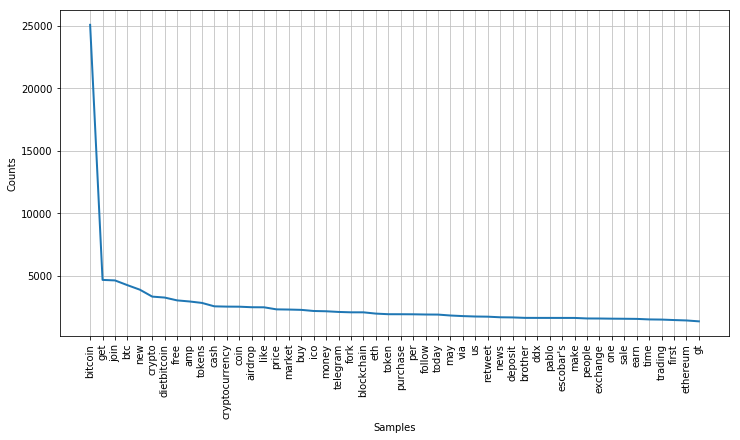

In [51]:
plt.figure(figsize=(12,6))
freq_dist_text.plot(50, cumulative=False)

# Sentiment Analysis with Vader

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [53]:
sia = SentimentIntensityAnalyzer()

In [54]:
len(final_clean_text_list) == len(text_list)

True

In [55]:
ppp = sia.polarity_scores(final_clean_text_list[5])
ppp2 = sia.polarity_scores(text_list[5])

In [56]:
ppp
ppp2

{'compound': 0.2023, 'neg': 0.0, 'neu': 0.795, 'pos': 0.205}

{'compound': 0.4263, 'neg': 0.0, 'neu': 0.911, 'pos': 0.089}

In [ ]:
# get comparison of neutralness between cleaned text and fulltext tweet

ppp = []
ppp2 = []

for i in range(len(final_clean_text_list)):
    x = sia.polarity_scores(final_clean_text_list[i])
    ppp.append(x["neu"])
    
    y = sia.polarity_scores(text_list[i])
    ppp2.append(y["neu"])

In [ ]:
# counter
more_neutral = 0
is_neutral = 0
less_neutral = 0

for i in range(len(final_clean_text_list)):
    if ppp[i] > ppp2[i]:
        more_neutral += 1
    elif ppp[i] < ppp2[i]:
        less_neutral += 1
    else:
        is_neutral += 1

In [ ]:
more_neutral
is_neutral
less_neutral

### From the above comparison, we can conclude that there's more neutrality in text that hasn't been cleaned (more bias). It is probably because of https, #, @, etc. 

### Below we'll start to do sentiment analysis on the cleaned text

In [ ]:
# example print polarity level 

for text in final_clean_text_list[0:5]:
    print(text)
    ss = sia.polarity_scores(text)
    for k in ss:
        print("{0}: {1},".format(k, ss[k], end=""))
    print()

In [ ]:
def find_compound(text):
    polarity_level = sia.polarity_scores(text)
    return polarity_level['compound']

In [ ]:
compound_level = list(map(find_compound, final_clean_text_list))

In [ ]:
compound_level[0:5]

In [ ]:
total_compound = sum(compound_level[:])
total_compound # positive

In [ ]:
# label the sentiment on negative, neutral and positive
# less than -3 is negative, between -3 to 3 is neutral, and more than 3 is positive

for i in range(len(compound_level)):
    if compound_level[i] < -0.3:
        compound_level[i] = "neg"
    elif compound_level[i] > 0.3:
        compound_level[i] = "pos"
    else:
        compound_level[i] = "neu"

In [ ]:
compound_level[0:10]

In [ ]:
compound_level.count("neg")
compound_level.count("neu")
compound_level.count("pos")

In [ ]:
from matplotlib.gridspec import GridSpec

In [ ]:
compound_fraction = [compound_level.count("neg"), compound_level.count("neu"), compound_level.count("pos")]
compound_labels = ["negative", "neutral", "positive"]

In [ ]:
grid = GridSpec(1, 1)

plt.subplot(grid[0, 0], aspect=1)

plt.pie(compound_fraction, labels=compound_labels, autopct='%1.1f%%')

plt.show()

# Topic Modelling

# Sentiment Analysis with TextBlob

In [ ]:
from textblob import TextBlob

Make function to get polarity level and subjectivity level

In [ ]:
# defining function to get polarity and subjectivity

def find_polarity(word):
    try:
        return TextBlob(word).polarity
    except:
        pass
    
def find_subjectivity(word):
    try:
        return TextBlob(word).subjectivity
    except:
        pass

Make index from numpy array

In [ ]:
ds_lang_en["index"] = np.arange(len(ds_lang_en))
ds_lang_en.tail()

In [ ]:
ds_lang_en.set_index("index", inplace=True)

In [ ]:
ds_lang_en.tail(15)

In [ ]:
# use copy to add dataframe
# df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
ds_lang_en = ds_lang_en.assign(cleandata = final_clean_text_list)

In [ ]:
ds_lang_en.tail(15)

Apply function to all values on the data frame

In [ ]:
ds_lang_en['polarity'] = ds_lang_en['cleandata'].apply(lambda text:find_polarity(text))
ds_lang_en['subjectivity'] = ds_lang_en['cleandata'].apply(lambda text:find_subjectivity(text))

In [ ]:
ds_lang_en.head()
ds_lang_en.tail()

Visualize polarity level

In [ ]:
ds_lang_en.polarity.hist()

Visualize subjectivity level

In [ ]:
ds_lang_en.subjectivity.hist()

Give labels to polarity and subjectivity levels

In [ ]:
ds_lang_en['polaritylabels'] = pd.cut(ds_lang_en.polarity, 3, labels=["negative", "neutral", "positive"])
ds_lang_en['subjectivitylabels'] = pd.cut(ds_lang_en.subjectivity, 2, labels=["objective", "subjective"])

In [ ]:
ds_lang_en.head()
ds_lang_en.tail()

Check number of data according to polarity and subjectivity levels

In [ ]:
text_polarity = ds_lang_en["polaritylabels"].value_counts()
text_subjectivity = ds_lang_en["subjectivitylabels"].value_counts()

print(text_polarity, "\n\n", text_subjectivity)

Plot the polarity and subjectivity levels

In [ ]:
from matplotlib.gridspec import GridSpec

labels_pol = []
fracs_pol = []

labels_subj = []
fracs_subj = []

total = text_polarity.sum()

for k, v in text_polarity.items():
    labels_pol.append(k)
    fracs_pol.append(v/total)

for k, v in text_subjectivity.items():
    labels_subj.append(k)
    fracs_subj.append(v/total)

In [ ]:
grid = GridSpec(1, 1)

plt.subplot(grid[0, 0], aspect=1)

plt.pie(fracs_pol, labels=labels_pol, autopct='%1.1f%%')

plt.show()

In [ ]:
grid = GridSpec(1, 1)

plt.subplot(grid[0, 0], aspect=1)

plt.pie(fracs_subj, labels=labels_subj, autopct='%1.1f%%', shadow=True)